*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall23/notebooks/module01_03_dot_products.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Linear Algebra Meets Geometry Part 2

In this notebook we continue the discussion of vectors and geometrical operations on them that are relevant to machine learning.

### *Support code*

Imports and useful functions

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [3]:
from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')
    


In [4]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.1, head_length=0.2, length_includes_head=True,
              **options)

## The norm of a vector

The *length* of a vector in two dimensions $\mathbf{v} = (v_1, v_2)^\top$ is equal to $\sqrt{v_1^2 + v_2^2}$.  This is a simple application of the Pythagorean theorem.
For example:

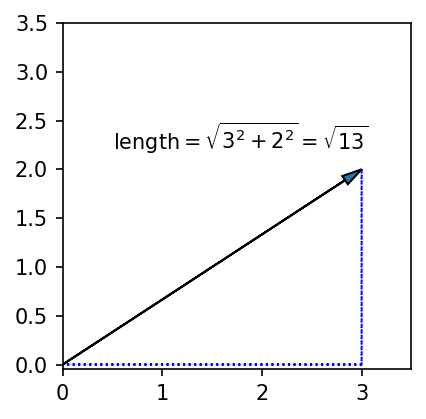

In [19]:
fig=plt.figure(figsize=(3,3))
#plt.grid()
plot_vector((3,2))
plt.ylim(-0.05,3.5);
plt.xlim(0,3.5);
plt.arrow(3,0,0,2, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.arrow(0,0,3,0, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.text(0.5,2.2 , r'$\mathrm{length} = \sqrt{3^2+2^2}=\sqrt{13}$');


We can generalize this concept to vectors in $d$ dimensions.  

Let $\mathbf{v} = (v_1, v_2,\ldots,v_d)^\top$. Its length or **norm** is given by:

$$
||\mathbf{v}|| = \sqrt{\sum_{i=1}^d v_i^2}.
$$

This is such a common operation that NumPy has a function for computing it:

In [20]:
np.linalg.norm(np.array([1,3,5]))

5.916079783099616

### Exercise:

* Write pure Python code that verifies that `np.linalg.norm` is giving the expected result.

In [21]:
def norm(a_list) :
    """
    Compute the norm of the given vector, provided as a python list
    
    """
   
    return 0

#verify that your implementation matches the NumPy implementation:
norm([1,3,5]) == np.linalg.norm(np.array([1,3,5]))

0

### Unit vectors

A vector with a norm equal to 1 is called a **unit vector**.

Given a vector $\mathbf{u}$ it is easy to make it into a unit vector by dividing by its norm:

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{||\mathbf{u}||}
$$

This operation is called *normalization*.  It produces a vector that points in the same direction of the original vector.

From our discussion above, we now know that a unit vector captures the direction a vector points at.

In fact, any vector can be represented as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  In other words, a vector is determined by its direction, and length.
Or in other words, think of a vector as a direction, and the size of the step to take in that direction.


### Exercise:

* Write code for converting a vector to a unit vector.  Verify that the resulting vector is indeed a unit vector (how?)

In [22]:
def normalize(vector):
    return vector

# verify that the result of normalize is indeed a unit vector

## The dot product

The **dot product** between two vectors $\mathbf{u}$ and $\mathbf{v}$ is defined as:

$$\mathbf{u}^\top\mathbf{v} = \sum_{i=1}^d u_i v_i.$$

The dot product is often represented using the *dot* operator as $\mathbf{u}\cdot\mathbf{v}$.

We note that the dot product is symmetric, i.e. does not depend on the order of its operands:

$$
\mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}.
$$

You can compute the dot product using NumPy:

In [23]:
u = np.array([1, 0, 1])
v = np.array([0, -1, 2])
np.dot(u,v)

2

The `dot` function can be invoked as a method or using the `@` operator:

In [24]:
print(u.dot(v), u @ v)

2 2


And to round things off, here's a pure Python implementation:

In [25]:
u = [1, 0, 1]
v = [0, -1, 2]
sum(a*b for a,b in zip(u,v))

2

### Exercise

* We have already seen how the `*` operator functions between a scalar and a vector in NumPy.  It also works between vectors.  However, the vectors need to be of the same size.

In [26]:
## define two one-dimensional numpy arrays of the same size and 
## check what is the result of multiplying them using the * operator

### Geometric interpretation of the dot product

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.

We'll start by considering the dot product between two unit vectors in two dimensions.

We'll show that the dot product of two unit vectors is equal to the cosine of the angle between them.
To demonstrate that, let us consider:

$$
\hat{\mathbf{u}} = [1,0]^\top \; \text{and} \; \hat{\mathbf{v}} = [\cos(\theta), \sin(\theta)]^\top.
$$

The vector $\hat{\mathbf{u}}$ is parallel to the $x$-axis, 
and $\hat{\mathbf{v}}$ is at an angle $\theta$ with respect to the $x$-axis.

We can easily compute the dot product between these vectors:

$$
\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = \cos(\theta)
$$

Now, as we have seen above, every vector $\mathbf{u}$ can be expressed as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  

Using this property, we can now compute the dot product between any two vectors in two dimensions as:

$$
\mathbf{u}^\top \mathbf{v} = ||\mathbf{u}|| \; ||\mathbf{v}|| \;\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = ||\mathbf{u}|| \; ||\mathbf{v}|| \cos(\theta)
$$

This fact is true in [general](https://en.wikipedia.org/wiki/Dot_product), i.e. for vectors in any dimension and orientation.

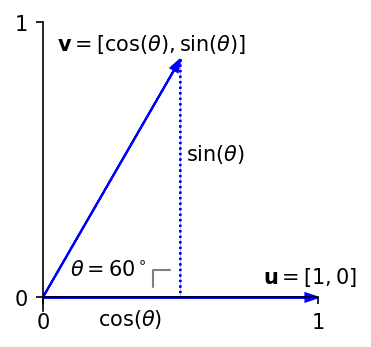

In [27]:
#plt.xkcd(scale=0., randomness=2)
fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(111)
ax.arrow(0,0,0.5,0.866, width=0.001, head_width=0.03, length_includes_head=True, 
         alpha=1, linestyle='-',color='b');
plt.ylim(-0.05,1);
plt.xlim(0,1);
ax.arrow(0,0,1,0, width=0.001, head_width=0.03, length_includes_head=True, 
         alpha=1, linestyle='-',color='b');
ax.arrow(0.5,0,0,0.866, width=0.001,length_includes_head=True, alpha=1,
         linestyle=':',color='b');
ax.text(0.8, 0.05, r'$\mathbf{u}=[1,0]$')
ax.text(0.05, 0.9, r'$\mathbf{v}=[\cos(\theta), \sin(\theta)]$')
plt.text(0.1,0.08 , r'$\theta = 60^\circ$');
plt.text(0.52, 0.5, r'$\sin(\theta)$');
plt.text(0.2, -0.1, r'$\cos(\theta)$');

ax.annotate("", xy=(0.4, 0), xycoords='data', xytext=(0.5, 0.1), 
            textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5", shrinkA=5, shrinkB=5, 
                            patchA=None, patchB=None, 
                            connectionstyle="angle,angleA=0,angleB=90,rad=0"))
axes_at_zero(ax)

### Orthogonality

Vectors for which the dot product is equal to zero are called **orthogonal**.

### Questions

* What is the angle between orthogonal vectors?

* What can you say about the angle between vectors that have positive coefficients?

* Express the norm of a vector as a dot product.

To help you, here is an [animation of the sine and cosine functions](https://www.desmos.com/calculator/cpb0oammx7) that nicely illustrates the geometry these functions; as an alternative, here's a static instead:

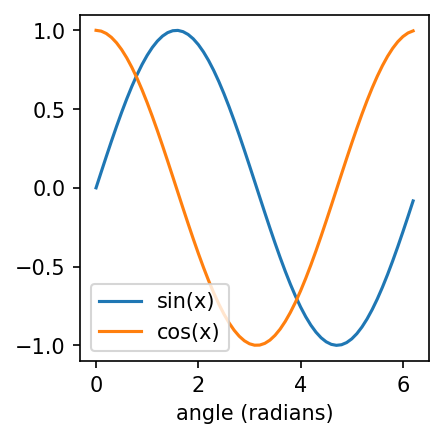

In [32]:
fig = plt.figure(figsize=(3,3))

x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)
plt.xlabel('angle (radians)')
plt.legend(['sin(x)', 'cos(x)']);


### Cosine similarity

In machine learning the cosine of the angle between two vectors is a common way to express their similarity, and given what we just learned, it can be expressed as:

$$
\cos(\theta) = \frac{\mathbf{v}^\top \mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$ 
when the two vectors point in the same direction, is equal to
$-1$ when they point in opposite directions,
and takes on the value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.

### Exercise

* Use NumPy to write code that computes the cosine between two vectors with an arbitrary number of dimensions.
Use your code to compute the angle between

$$
\mathbf{u} = \begin{pmatrix}
1 \\ 0 \\ -1 \\ 2
\end{pmatrix}, \qquad  \mathbf{v} = \begin{pmatrix}
3 \\ 1 \\ 0 \\ 1
\end{pmatrix}
$$

In [29]:
def cosine(u, v) :
    return 0

# Projections

Dot products with unit vectors have a special interpretation. 
A dot product with a unit vector is called a *projection*.  Let's try to understand why.

Let $\hat{\mathbf{u}}$ be a unit vector, and let $\mathbf{v}$ be a vector.  The dot product $\mathbf{v}^T \hat{\mathbf{u}}$ is called the project of $\mathbf{v}$ in the direction $\hat{\mathbf{u}}$.

Here's the justification for this definition:

$$\mathbf{v}^\top \hat{\mathbf{u}} = ||\mathbf{v}|| \cdot || \hat{\mathbf{u}}|| \cos(\theta) = ||\mathbf{v}|| \cos(\theta)$$

The following figure illustrates this idea.  Here we chose $\hat{\mathbf{u}} = (1,0)^\top$ to be aligned with the $x$ axis, and we see that the dot product of $\mathbf{v} = (2,1)^\top$ is equal to 2, namely the coordinate of $\mathbf{v}$ in the direction $\hat{\mathbf{u}}$.

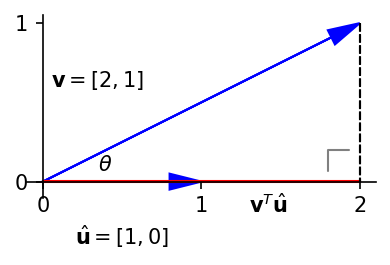

In [36]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

u = (2, 1)
v = (1, 0)

plot_vector(u, color="b")
plot_vector(v, color="b")
ax.arrow(0,0,2,0, width=0.01, head_width=0, 
         length_includes_head=True, 
         alpha=1, linestyle='-',color='r');

ax.arrow(2,0,0,1, width=0.001, head_width=0, 
         length_includes_head=True, 
         alpha=1, linestyle='--',color='k');
ax.text(0.2, -0.4, r'$\hat{\mathbf{u}}=[1,0]$')
ax.text(0.05, 0.6, r'$\mathbf{v}=[2, 1]$')
plt.text(0.35,0.07, r'$\theta$');
plt.text(1.3, -0.2, r'$\mathbf{v}^T \hat{\mathbf{u}}$')


ax.annotate("", xy=(1.8, 0), xycoords='data', xytext=(2, 0.2), 
            textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5", shrinkA=5, shrinkB=5, 
                            patchA=None, patchB=None, 
                            connectionstyle="angle,angleA=0,angleB=90,rad=0"))
axes_at_zero(ax)


## Summary

* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle between vectors of arbitrary dimensions.

Finally, here's a good [discussion](https://graphics.cs.wisc.edu/WP/cs559-fall2014/2014/08/28/points-vectors-and-coordinate-systems-why-are-points-and-vectors-different/) of points and vectors.